In [185]:
# Import libraries.
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from scipy import interpolate as ip # For interpolation of functional data.

# Load Stable DoS data.
dos_stable = pd.read_pickle('../raw/MP_dos_stable_energy_20240421.xz')

# Get metal data only.
dos_metal = dos_stable[dos_stable.is_metal].reset_index(drop = True)

dos_metal

,material_id,reduced_formula,chemical_system,gap,efermi,is_stable,is_metal,density,energy
0,mp-569794,Ta,Ta,0.0,5.264594,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.3333, -31.3103, -31.2873, -31.2643, -31.2..."
1,mp-62,Pa,Pa,0.0,13.102635,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.2563, -31.2271, -31.1979, -31.1687, -31.1..."
2,mp-582819,Pu,Pu,0.0,14.873514,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-35.0145, -34.9817, -34.9489, -34.9161, -34.8..."
3,mp-1018134,Li,Li,0.0,-0.229226,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-49.7156, -49.6826, -49.6496, -49.6166, -49.5..."
4,mp-1184115,Er,Er,0.0,3.025970,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.2646, -24.2385, -24.2123, -24.1862, -24.1..."
...,...,...,...,...,...,...,...,...,...
13684,mp-1214324,BaSmFeCuO5,Ba-Cu-Fe-O-Sm,0.0,2.925980,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-71.5295, -71.4786, -71.4277, -71.3768, -71.3..."
13685,mp-556333,K2ZnCu3P3O12F,Cu-F-K-O-P-Zn,0.0,2.004674,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-72.4215, -72.1095, -71.7976, -71.4856, -71.1..."
13686,mp-1200471,CsV3B2P4(H4O11)2,B-Cs-H-O-P-V,0.0,3.041387,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-40.0706, -40.041, -40.0115, -39.9819, -39.95..."
13687,mp-559534,Ba5Al2In2IrClO13,Al-Ba-Cl-In-Ir-O,0.0,3.472713,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.9619, -24.8218, -24.6817, -24.5416, -24.4..."


In [186]:
### Exclusion of outliers.
thd = 500
density_max = np.array([max(d) for d in dos_metal.density])
survive = (density_max < thd)
dos_metal = dos_metal.iloc[survive].reset_index(drop = True)
dos_metal

,material_id,reduced_formula,chemical_system,gap,efermi,is_stable,is_metal,density,energy
0,mp-569794,Ta,Ta,0.0,5.264594,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.3333, -31.3103, -31.2873, -31.2643, -31.2..."
1,mp-62,Pa,Pa,0.0,13.102635,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.2563, -31.2271, -31.1979, -31.1687, -31.1..."
2,mp-582819,Pu,Pu,0.0,14.873514,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-35.0145, -34.9817, -34.9489, -34.9161, -34.8..."
3,mp-1018134,Li,Li,0.0,-0.229226,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-49.7156, -49.6826, -49.6496, -49.6166, -49.5..."
4,mp-1184115,Er,Er,0.0,3.025970,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.2646, -24.2385, -24.2123, -24.1862, -24.1..."
...,...,...,...,...,...,...,...,...,...
10721,mp-1043874,CaLaFeNiO6,Ca-Fe-La-Ni-O,0.0,4.805851,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-63.4844, -63.3425, -63.2006, -63.0587, -62.9..."
10722,mp-1228257,Ba2YCu3PbO7,Ba-Cu-O-Pb-Y,0.0,3.929532,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-70.4211, -70.3714, -70.3218, -70.2721, -70.2..."
10723,mp-1214324,BaSmFeCuO5,Ba-Cu-Fe-O-Sm,0.0,2.925980,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-71.5295, -71.4786, -71.4277, -71.3768, -71.3..."
10724,mp-556333,K2ZnCu3P3O12F,Cu-F-K-O-P-Zn,0.0,2.004674,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-72.4215, -72.1095, -71.7976, -71.4856, -71.1..."


In [187]:
import numpy as np
from typing import Literal, Optional
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d

class InterpSmooth:
    """
    A class for 1D linear interpolation of (x, y) → x_new, plus optional smoothing.
    Supported smoothing methods: "savgol", "gaussian", "moving average", or None.
    Default smooth_method is "savgol".

    Parameters
    ----------
    x : np.ndarray
        1D array of original x-values (e.g., energy – E_f). Must be sorted in ascending
        and already restricted to the interval of interest.
    y : np.ndarray
        1D array of original y-values corresponding to x. Length must match len(x).
    smooth_method : Literal["savgol", "gaussian", "moving average"] or None, default="savgol"
        - "savgol":         apply a Savitzky–Golay filter after interpolation.
        - "gaussian":       apply a Gaussian‐kernel convolution after interpolation.
        - "moving average": apply a fixed-window moving-average filter after interpolation.
        - None:             do not apply any smoothing (return raw interpolation).
    """
    def __init__(
        self,
        x: np.ndarray,
        y: np.ndarray,
        smooth_method: Optional[Literal["savgol", "gaussian", "moving average"]] = "savgol"
    ):
        # Convert inputs to numpy arrays
        self.x = np.asarray(x)
        self.y = np.asarray(y)

        # Basic sanity checks
        if self.x.ndim != 1 or self.y.ndim != 1:
            raise ValueError("Input x and y must be 1D arrays.")
        if self.x.shape[0] != self.y.shape[0]:
            raise ValueError("x and y must have the same length.")

        # Ensure x is strictly increasing; if not, sort
        if not np.all(np.diff(self.x) > 0):
            idx_sort = np.argsort(self.x)
            self.x = self.x[idx_sort]
            self.y = self.y[idx_sort]

        # Validate the smoothing method
        valid_methods = {"savgol", "gaussian", "moving average", None}
        if smooth_method not in valid_methods:
            raise ValueError(
                f"smooth_method must be one of {valid_methods}, got '{smooth_method}'"
            )
        self.smooth_method = smooth_method

    def __call__(self, x_new, s_factor: float = 0.0, normalize: bool = False) -> np.ndarray:
        """
        Interpolate (self.x, self.y) onto x_new via linear interpolation,
        then optionally apply smoothing as specified by smooth_method and s_factor.
        Finally, if normalize=True, scale the output so that its maximum absolute value is 1.

        Parameters
        ----------
        x_new : array_like
            1D array of x-coordinates where we want interpolated (and possibly smoothed) y-values.
            Must be strictly increasing and uniformly spaced.
        s_factor : float, default=0.0
            - If s_factor <= 0.0: no smoothing → return raw interpolated y.
            - If smooth_method == "savgol": s_factor is treated as window length in x-units.
              Internally, window_points = int(s_factor / dx), forced to be an odd integer ≥ 3.
            - If smooth_method == "gaussian": s_factor is interpreted as Gaussian sigma in x-units.
              Internally, sigma_pts = s_factor / dx (points). If sigma_pts ≤ 0, no smoothing.
            - If smooth_method == "moving average": s_factor is treated as window length in x-units.
              Internally, window_points = int(s_factor / dx). If window_points ≤ 1, no smoothing.
        normalize : bool, default=False
            If True, after interpolation (and smoothing), divide the output array by its maximum
            absolute value. If the maximum is zero, it returns the array unchanged to avoid division by zero.

        Returns
        -------
        y_out : np.ndarray
            1D array of length len(x_new). Either raw interpolated values
            (if no smoothing), or smoothed values after applying the chosen method.
            If normalize=True, the result is scaled so that max(abs(y_out)) == 1.
        """
        # Convert x_new to numpy and basic checks
        x_new_arr = np.asarray(x_new)
        if x_new_arr.ndim != 1 or x_new_arr.shape[0] < 2:
            raise ValueError("x_new must be a 1D array with at least two points.")
        if not np.all(np.diff(x_new_arr) > 0):
            raise ValueError("x_new must be strictly increasing and uniformly spaced.")

        # STEP 1: Linear interpolation
        y_interp = np.interp(x_new_arr, self.x, self.y)

        # STEP 2: If no smoothing requested, or s_factor <= 0, assign raw interpolation
        if self.smooth_method is None or s_factor <= 0.0:
            y_out = y_interp
        else:
            # Compute dx from x_new (assumes uniform spacing)
            dx = x_new_arr[1] - x_new_arr[0]
            if dx <= 0:
                raise ValueError("x_new must be strictly increasing with positive spacing.")

            # ------------------------------------------------------------------
            #  Savitzky–Golay smoothing
            # ------------------------------------------------------------------
            if self.smooth_method == "savgol":
                # Interpret s_factor as window length in x-units → convert to number of points
                win_pts = int(s_factor / dx)

                # Enforce minimum odd window length (≥ 3)
                if win_pts < 3:
                    # Too small: skip smoothing
                    y_out = y_interp
                else:
                    if win_pts % 2 == 0:
                        win_pts += 1  # make it odd

                    # Choose polynomial order (must be < win_pts). Here polyorder=2 by default.
                    polyorder = 2
                    if win_pts <= polyorder:
                        # Window too small to support polyorder
                        y_out = y_interp
                    else:
                        # Apply Savitzky–Golay filter
                        y_out = savgol_filter(
                            y_interp,
                            window_length=win_pts,
                            polyorder=polyorder,
                            mode='interp'
                        )

            # ------------------------------------------------------------------
            #  Gaussian Filter smoothing
            # ------------------------------------------------------------------
            elif self.smooth_method == "gaussian":
                # Interpret s_factor as sigma in x-units
                sigma_pts = s_factor / dx
                if sigma_pts <= 0:
                    # No smoothing
                    y_out = y_interp
                else:
                    # Apply 1D Gaussian filter (mode='nearest' to handle boundaries)
                    y_out = gaussian_filter1d(y_interp, sigma=sigma_pts, mode='nearest')

            # ------------------------------------------------------------------
            #  Moving-average smoothing
            # ------------------------------------------------------------------
            elif self.smooth_method == "moving average":
                # Interpret s_factor as window length in x-units → convert to number of points
                n_conv = int(s_factor / dx)
                if n_conv <= 1:
                    # Too small: skip smoothing
                    y_out = y_interp
                else:
                    # Build uniform boxcar kernel and convolve
                    kernel = np.ones(n_conv, dtype=np.float64) / n_conv
                    y_out = np.convolve(y_interp, kernel, mode="same")

            # ------------------------------------------------------------------
            #  Should not reach here due to validation in __init__
            # ------------------------------------------------------------------
            else:
                raise RuntimeError(f"Unsupported smoothing method '{self.smooth_method}'")

        # STEP 3: Normalize if requested
        if normalize:
            max_val = np.max(np.abs(y_out))
            if max_val > 0:
                y_out = y_out / max_val

        return y_out

In [74]:
start, end = -6.5, 10.5

x, y = dos_5247.energy - dos_5247.efermi, dos_5247.density
mask = (x >= start) & (x <= end)
x, y = x[mask], y[mask]

x_new = np.linspace(start, end, 500) # pre-selected range = (-6,5, 10.5).

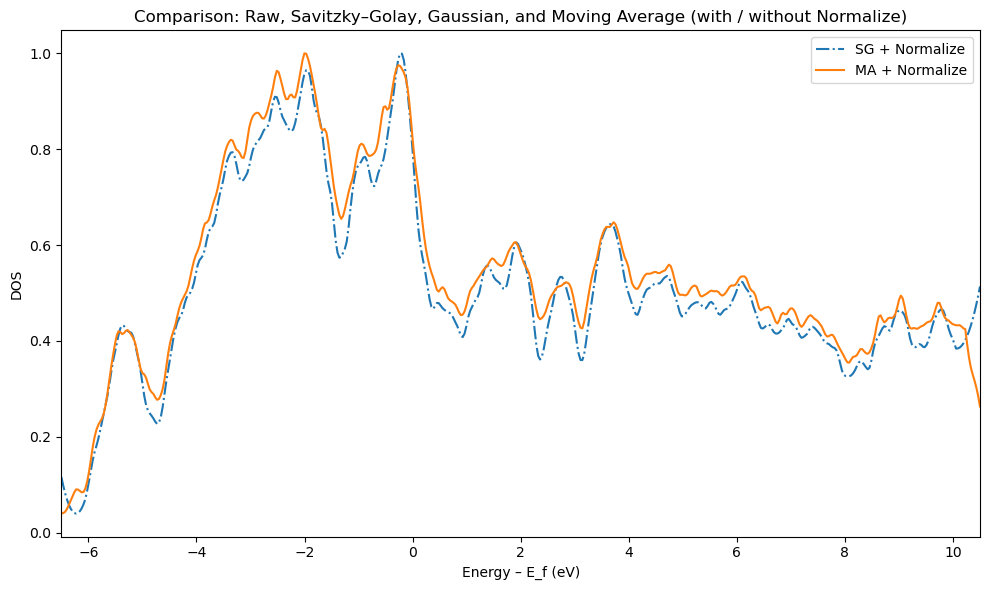

In [178]:
# Mask to [-6.5, 10.5] and sort:
start, end = -6.5, 10.5
mask = (x >= start) & (x <= end)
x_masked = x[mask]
y_masked = y[mask]
idx_sort = np.argsort(x_masked)
x_sel = x_masked[idx_sort]
y_sel = y_masked[idx_sort]


# 2) Create the InterpSmooth object (default is "savgol")
interp = InterpSmooth(x_sel, y_sel, smooth_method="savgol")

# 3) Generate uniform grid for interpolation
x_new = np.linspace(start, end, 500)

# 4a) Raw interpolation (no smoothing, since s_factor=0)
y_raw = interp(x_new, s_factor=0.0, normalize=False)

# 4b) Savitzky–Golay smoothing with window length = 0.6 (in x-units), without normalization
y_sgol = interp(x_new, s_factor=0.9, normalize=False)

# 4c) Savitzky–Golay smoothing with window length = 0.6, then normalize
y_sgol_norm = interp(x_new, s_factor=0.9, normalize=True)

# 4d) Gaussian smoothing with sigma = 0.6, without normalization
interp_ma = InterpSmooth(x_sel, y_sel, smooth_method="moving average")
y_ma = interp_ma(x_new, s_factor=0.6, normalize=False)

# 4e) Moving-average smoothing with window = 0.6, then normalize
interp_ma = InterpSmooth(x_sel, y_sel, smooth_method="moving average")
y_ma_norm = interp_ma(x_new, s_factor=0.6, normalize=True)

# 5) Plot comparison
plt.figure(figsize=(10, 6))
# plt.plot(x_sel, y_sel, 'o', ms=2, label='Original discrete DOS')
# plt.plot(x_new, y_raw, '-', lw=1, label='Linear interp (no smooth)')
# plt.plot(x_new, y_sgol, '--', lw=1.5, label='Savitzky–Golay (win=0.9)')
# plt.plot(x_new, y_ma, ':', lw=1.5, label='Moving average (win=0.6)')
plt.plot(x_new, y_sgol_norm, '-.', lw=1.5, label='SG + Normalize')
plt.plot(x_new, y_ma_norm, '-', lw=1.5, label='MA + Normalize')
plt.xlim(start, end)
plt.xlabel('Energy – E_f (eV)')
plt.ylabel('DOS')
plt.legend(loc='best')
plt.title('Comparison: Raw, Savitzky–Golay, Gaussian, and Moving Average (with / without Normalize)')
plt.tight_layout()
plt.show()

In [192]:
start, end = -6.5, 10.5

x_new = np.linspace(start + 0.5, end - 0.5, 500) # pre-selected range = (-6,5, 10.5).
y_new_list = []
y_new_normal_list = []

for id_, data in dos_metal.iterrows():
    x, y = data.energy - data.efermi, data.density
    mask = (x >= start) & (x <= end)
    x, y = x[mask], y[mask]

    interp = InterpSmooth(x, y, smooth_method="savgol")
    y_sgol = interp(x_new, s_factor=.9)
    y_sgol_norm = interp(x_new, s_factor=0.9, normalize=True)

    y_new_list.append(y_sgol.tolist())
    y_new_normal_list.append(y_sgol_norm.tolist())

dos_metal_processed = dos_metal.rename(columns={'density': "density_raw", 'energy': 'energy_raw'}) 
dos_metal_processed = dos_metal_processed.assign(
    energy=[x_new.tolist()] * dos_metal_processed.shape[0],
    density=y_new_list,
    density_norm=y_new_normal_list,
).set_index('material_id')

dos_metal_processed.to_pickle('../dos_metal_processed_20240421.pd.xz')
dos_metal_processed

,reduced_formula,chemical_system,gap,efermi,is_stable,is_metal,density_raw,energy_raw,energy,density,density_norm
material_id,,,,,,,,,,,
mp-569794,Ta,Ta,0.0,5.264594,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.3333, -31.3103, -31.2873, -31.2643, -31.2...","[-6.0, -5.967935871743487, -5.935871743486974,...","[3.830508200593496, 3.9112246648565288, 3.9883...","[0.0620756786476286, 0.06338373727452007, 0.06..."
mp-62,Pa,Pa,0.0,13.102635,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.2563, -31.2271, -31.1979, -31.1687, -31.1...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
mp-582819,Pu,Pu,0.0,14.873514,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-35.0145, -34.9817, -34.9489, -34.9161, -34.8...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
mp-1018134,Li,Li,0.0,-0.229226,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-49.7156, -49.6826, -49.6496, -49.6166, -49.5...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
mp-1184115,Er,Er,0.0,3.025970,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.2646, -24.2385, -24.2123, -24.1862, -24.1...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.014712959511100252, 0.007685369746201714, 0...","[0.0026869720626863814, 0.0014035499644975827,..."
...,...,...,...,...,...,...,...,...,...,...,...
mp-1043874,CaLaFeNiO6,Ca-Fe-La-Ni-O,0.0,4.805851,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-63.4844, -63.3425, -63.2006, -63.0587, -62.9...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.33370290973727124, 0.30308036841495906, 0.2...","[0.07206388605970859, 0.06545088010645739, 0.0..."
mp-1228257,Ba2YCu3PbO7,Ba-Cu-O-Pb-Y,0.0,3.929532,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-70.4211, -70.3714, -70.3218, -70.2721, -70.2...","[-6.0, -5.967935871743487, -5.935871743486974,...","[4.340802849988364, 4.072350033078985, 3.82806...","[0.2012902373998977, 0.18884163443086283, 0.17..."
mp-1214324,BaSmFeCuO5,Ba-Cu-Fe-O-Sm,0.0,2.925980,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-71.5295, -71.4786, -71.4277, -71.3768, -71.3...","[-6.0, -5.967935871743487, -5.935871743486974,...","[1.4751833509508692, 1.9804654957559724, 2.455...","[0.10666833683757063, 0.1432045450216853, 0.17..."


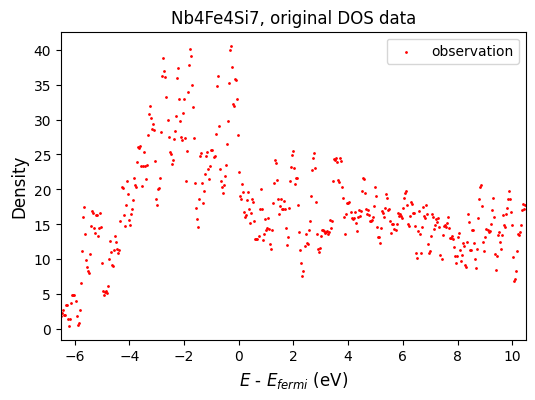

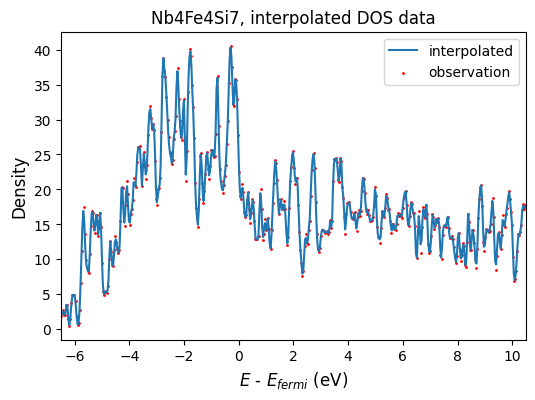

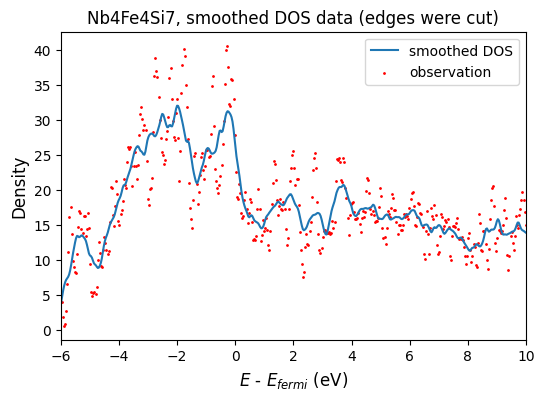

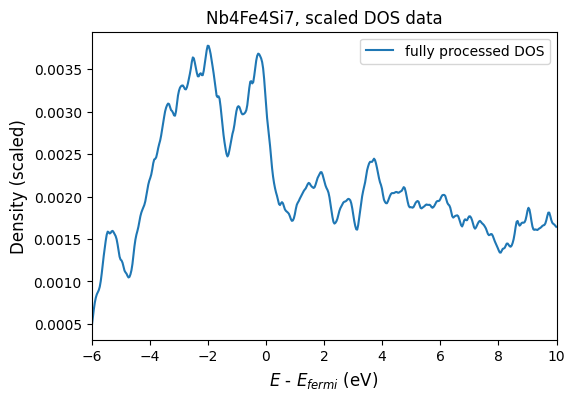

In [3]:
# Visualization of smoothing process of DOS data.
i = 5236

target_formula = dos_processed.iloc[i]["reduced_formula"]

y = dos_metal[dos_metal.reduced_formula == target_formula]["density"].values[0]
x = dos_metal[dos_metal.reduced_formula == target_formula]["energy"].values[0] - dos_metal[dos_metal.reduced_formula == target_formula]["efermi"].values[0]
range_x = (-6.5 <= x) & (10.5 >= x)
range_x2 = (-6.0 <= x) & (10.0 >= x)

# Original DOS data.
fig = plt.figure(figsize=(6,4))
plt.title(f"{target_formula}, original DOS data")
plt.scatter(x[range_x], y[range_x], color = "red", s = 1, label = "observation")
plt.legend()
plt.xlim(-6.5, 10.5)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density", fontsize="large")
plt.show()

# Interpolated DOS data.
fig = plt.figure(figsize=(6,4))
plt.title(f"{target_formula}, interpolated DOS data")
plt.plot(energy, density[i], label = "interpolated")
plt.scatter(x[range_x], y[range_x], color = "red", s = 1, label = "observation")
plt.legend()
plt.xlim(-6.5, 10.5)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density", fontsize="large")
plt.show()

# DOS after smoothing (+ edges were cut).
fig = plt.figure(figsize=(6,4))
plt.title(f"{target_formula}, smoothed DOS data (edges were cut)")
plt.plot(energy_cut, density_cut[i], label = "smoothed DOS")
plt.scatter(x[range_x2], y[range_x2], color = "red", s = 1, label = "observation")
plt.legend()
plt.xlim(-6, 10)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density", fontsize="large")
plt.show()

# DOS after smoothing and scaling.
fig = plt.figure(figsize=(6,4))
plt.title(f"{target_formula}, scaled DOS data")
plt.plot(energy_cut, density_scaled[i], label = "fully processed DOS")
plt.legend()
plt.xlim(-6, 10)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density (scaled)", fontsize="large")
plt.show()